#Load data

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Import data
df_heart = pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart.csv")
print(df_heart.head().to_markdown())
print(df_heart["target"].unique())
print(len(df_heart.columns))

In [3]:
# Prepare data (training and testing sets)
from sklearn.model_selection import train_test_split
X = df_heart.drop("target", 1)
y = df_heart["target"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=1, stratify = y) # random state for repeatability

# PCA

In [9]:
# Use PCA to reduce dimensionnality 
pcaModel = PCA(n_components=0.90) # n_components = 2
x_pca = pcaModel.fit_transform(normalize(df_heart.drop("target",1)))
print("There are " + str(pcaModel.n_components_) + " pca components and it explains " + str(np.sum(pcaModel.explained_variance_ratio_)) + " % of variance.")
print(pcaModel.components_)
print(pcaModel.explained_variance_ratio_)

There are 2 pca components and it explains 0.9462159685964682 % of variance.
[[ 5.10574011e-02  2.97341250e-03  9.00339993e-03  3.41719633e-01
  -6.31909107e-01  4.82540666e-04  3.54609313e-03  6.93642249e-01
  -2.41807806e-03 -2.20753696e-03  6.30640257e-03 -2.19638268e-03
   3.75771655e-03]
 [ 3.20012539e-01  2.15925744e-03 -5.79849027e-03  7.54291535e-01
  -1.67519692e-01  2.49770171e-03 -7.73786093e-04 -5.47528737e-01
   6.23496525e-03  2.19426543e-02 -7.79055150e-03  1.12794413e-02
   5.68281801e-03]]
[0.68600394 0.26021203]


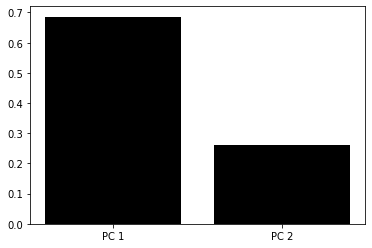

In [13]:
# See explained variance per PC
plt.bar(["PC 1", "PC 2"], pcaModel.explained_variance_ratio_, color="black")
plt.show()

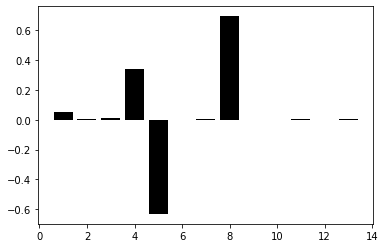

In [12]:
# See impact of each feature on PC 1
plt.bar(range(1, len(pcaModel.components_[0])+1), pcaModel.components_[0], color="black")
plt.show()

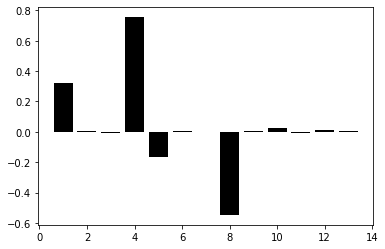

In [11]:
# See impact of each feature on PC 2
plt.bar(range(1, len(pcaModel.components_[1])+1), pcaModel.components_[1], color="black")
plt.show()

In [14]:
# SVM with original data
model_SVM = SVC()
model_SVM.fit(Xtrain, ytrain)
ypredict_SVM = model_SVM.predict(Xtest)
print(accuracy_score(ytest, ypredict_SVM))

0.6842105263157895


In [15]:
# SVM with pca data
pcaModel = PCA(n_components=0.90) # n_components = 2
X_train_pca = pcaModel.fit_transform(normalize(Xtrain))
X_test_pca = pcaModel.transform(normalize(Xtest))
model_SVM = SVC()
model_SVM.fit(X_train_pca, ytrain)
ypredict_SVM = model_SVM.predict(X_test_pca)
print(accuracy_score(ytest, ypredict_SVM))

0.7105263157894737


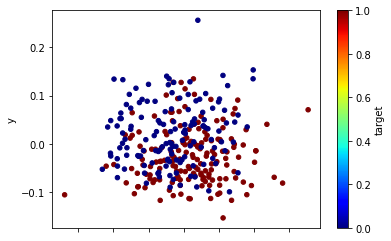

In [16]:
# Plot data points
df_pca = pd.DataFrame(
        data = np.c_[pcaModel.transform(normalize(X)), y],
        columns = ["x", "y", "target"]
        )
df_pca.plot.scatter(x = "x", y = "y", c='target', colormap='jet')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


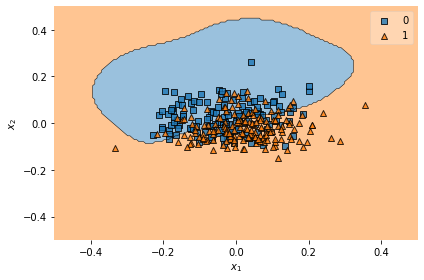

In [17]:
from mlxtend.plotting import plot_decision_regions

#graph
plot_decision_regions(x_pca, y.values, clf=model_SVM) 
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.tight_layout()
plt.show()

# Standardization

In [18]:
# Result with basis data
model_KNN = KNeighborsClassifier(n_neighbors = 20)
model_KNN.fit(Xtrain, ytrain)
ypredict_KNN = model_KNN.predict(Xtest)
print(accuracy_score(ytest, ypredict_KNN))

0.6842105263157895


In [19]:
# Z-standardization
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(Xtrain)
scaled_X_test = scaler.transform(Xtest)

In [20]:
model_KNN = KNeighborsClassifier(n_neighbors = 20)
model_KNN.fit(scaled_X_train, ytrain)
ypredict_KNN = model_KNN.predict(scaled_X_test)
print(accuracy_score(ytest, ypredict_KNN))

0.8552631578947368


In [21]:
# SVM with standardization
model_SVM = SVC()
model_SVM.fit(scaled_X_train, ytrain)
ypredict_SVM = model_SVM.predict(scaled_X_test)
print(accuracy_score(ytest, ypredict_SVM))

0.8026315789473685


In [22]:
# Min-Max standardization
MMscaler = MinMaxScaler()
MMscaled_X_train = MMscaler.fit_transform(Xtrain)
MMscaled_X_test = MMscaler.transform(Xtest)

In [23]:
model_KNN = KNeighborsClassifier(n_neighbors = 20)
model_KNN.fit(MMscaled_X_train, ytrain)
ypredict_KNN = model_KNN.predict(MMscaled_X_test)
print(accuracy_score(ytest, ypredict_KNN))

0.8026315789473685
